# 介绍 <a id = '1'>

>此部分为探索性分析，主要目的是了解数据，熟悉数据，为后续的特征工程做准备。

**目的：**
- 1.EDA价值主要在于熟悉了解整个数据集的基本情况（缺失值，异常值），对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.

- 2.了解变量间的相互关系、变量与预测值之间的存在关系。

- 3.为特征工程做准备

**主要内容：**
- 数据总体了解：
  - 读取数据集并了解数据集大小，原始特征维度；
  - 通过info熟悉数据类型；
  - 粗略查看数据集中各特征基本统计量；
- 缺失值和唯一值：
  - 查看数据缺失值情况
  - 查看唯一值特征情况
- 深入数据-查看数据类型
  - 类别型数据
  - 数值型数据
    - 离散数值型数据
    - 连续数值型数据
- 数据间相关关系
  - 特征和特征之间关系
  - 特征和目标变量之间关系
- 用pandas_profiling生成数据报告


**文件说明：**

数据来源为“天池”的学习赛：*零基础入门金融风控-贷款违约预测*

以下代码主要参考该比赛的开源代码

比赛项目地址：https://tianchi.aliyun.com/competition/entrance/531830/forum

开源地址：https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.6.3b3022faPv9qKZ&postId=129320

   

# 数据概览 <a id = '2'>

In [1]:
# 导入数据分析及可视化过程需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

**说明：**

本次数据分析探索，尤其可视化部分均选取某些特定变量进行了举例，所以它只是一个方法的展示而不是整个数据分析的解决方案。

## 读取文件 <a id = '2.1'>

In [2]:
#读取文件,注意数据存储的路径
data = pd.read_csv('train.csv')

In [3]:
#查看数据的前5行
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


## 查看数据集的基本信息  <a id = '2.2'>

In [4]:
#使用shape函数查看数据集的形状
data.shape

(800000, 47)

该数据集拥有80万条样本,47个特征

In [5]:
#查看一下具体的列名
data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

这里简单说明一下各列所表示的特征含义：
- id:为贷款清单分配的唯一信用证标识
- loanAmnt:贷款金额
- term:贷款期限（year）
- interestRate:贷款利率
- installment:分期付款金额
- grade:贷款等级
- subGrade:贷款等级之子级
- employmentTitle:就业职称
- employmentLength:就业年限（年）
- homeOwnership:借款人在登记时提供的房屋所有权状况
- annualIncome:年收入
- verificationStatus:验证状态
- issueDate:贷款发放的月份
- purpose:借款人在贷款申请时的贷款用途类别
- postCode:借款人在贷款申请中提供的邮政编码的前3位数字
- regionCode:地区编码
- dti:债务收入比
- delinquency_2years:借款人过去2年信用档案中逾期30天以上的违约事件数
- ficoRangeLow:借款人在贷款发放时的fico所属的下限范围
- ficoRangeHigh:借款人在贷款发放时的fico所属的上限范围
- openAcc:借款人信用档案中未结信用额度的数量
- pubRec:贬损公共记录的数量
- pubRecBankruptcies:公开记录清除的数量
- revolBal:信贷周转余额合计
- revolUtil:循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
- totalAcc:借款人信用档案中当前的信用额度总数
- initialListStatus:贷款的初始列表状态
- applicationType:表明贷款是个人申请还是与两个共同借款人的联合申请
- earliesCreditLine:借款人最早报告的信用额度开立的月份
- title:借款人提供的贷款名称
- policyCode:公开可用的策略_代码=1新产品不公开可用的策略_代码=2
- n系列匿名特征:匿名特征n0-n14，为一些贷款人行为计数特征的处理

In [6]:
#查看数据的一些基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

整个数据集中有33个float类型特征,9个int类型变量,5个object类型变量,其中许多变量存在缺失值

In [7]:
#查看数据的统计性描述
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,800000.0,399999.500000,230940.252015,0.00,199999.75,399999.500,599999.25,799999.00
loanAmnt,800000.0,14416.818875,8716.086178,500.00,8000.00,12000.000,20000.00,40000.00
term,800000.0,3.482745,0.855832,3.00,3.00,3.000,3.00,5.00
interestRate,800000.0,13.238391,4.765757,5.31,9.75,12.740,15.99,30.99
installment,800000.0,437.947723,261.460393,15.69,248.45,375.135,580.71,1715.42
employmentTitle,799999.0,72005.351714,106585.640204,0.00,427.00,7755.000,117663.50,378351.00
homeOwnership,800000.0,0.614213,0.675749,0.00,0.00,1.000,1.00,5.00
annualIncome,800000.0,76133.910493,68947.513672,0.00,45600.00,65000.000,90000.00,10999200.00
verificationStatus,800000.0,1.009683,0.782716,0.00,0.00,1.000,2.00,2.00
isDefault,800000.0,0.199513,0.399634,0.00,0.00,0.000,0.00,1.00


某些特征存在异常值,如`dti`的75%分位数仅仅为24,但是最大值达到了999

## 查看数据集中特征缺失值，唯一值等 <a id = '2.3'>

### 查看缺失值并处理 <a id = '2.3.1'>

In [8]:
print(f'共有{data.isnull().any().sum()}个特征存在缺失值')

have_null_fea_dict = {}
for key,value in (data.isnull().sum()).to_dict().items():
    if value != 0:
        have_null_fea_dict[key] = value
        miss_prec = (value/len(data))*100
        print(f'其中{key}列的缺失个数为{value}, 缺失比例为{round(miss_prec,4)}%')

共有22个特征存在缺失值
其中employmentTitle列的缺失个数为1, 缺失比例为0.0001%
其中employmentLength列的缺失个数为46799, 缺失比例为5.8499%
其中postCode列的缺失个数为1, 缺失比例为0.0001%
其中dti列的缺失个数为239, 缺失比例为0.0299%
其中pubRecBankruptcies列的缺失个数为405, 缺失比例为0.0506%
其中revolUtil列的缺失个数为531, 缺失比例为0.0664%
其中title列的缺失个数为1, 缺失比例为0.0001%
其中n0列的缺失个数为40270, 缺失比例为5.0338%
其中n1列的缺失个数为40270, 缺失比例为5.0338%
其中n2列的缺失个数为40270, 缺失比例为5.0338%
其中n3列的缺失个数为40270, 缺失比例为5.0338%
其中n4列的缺失个数为33239, 缺失比例为4.1549%
其中n5列的缺失个数为40270, 缺失比例为5.0338%
其中n6列的缺失个数为40270, 缺失比例为5.0338%
其中n7列的缺失个数为40270, 缺失比例为5.0338%
其中n8列的缺失个数为40271, 缺失比例为5.0339%
其中n9列的缺失个数为40270, 缺失比例为5.0338%
其中n10列的缺失个数为33239, 缺失比例为4.1549%
其中n11列的缺失个数为69752, 缺失比例为8.719%
其中n12列的缺失个数为40270, 缺失比例为5.0338%
其中n13列的缺失个数为40270, 缺失比例为5.0338%
其中n14列的缺失个数为40270, 缺失比例为5.0338%


<AxesSubplot:>

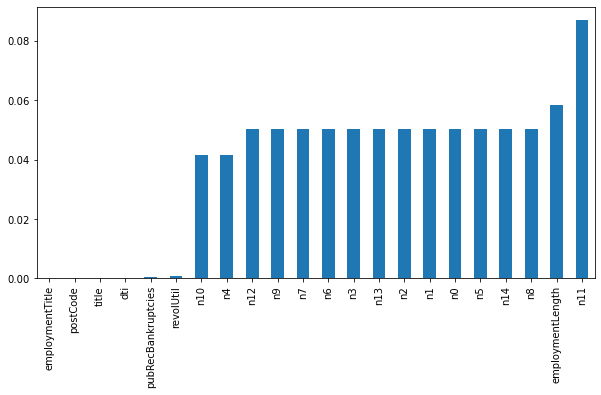

In [9]:
# nan可视化
missing = data.isnull().sum()/len(data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (10,5))

**缺失值处理方法**

- 首先可以从特征的角度出发,如果某一列nan的个数比较大，说明这一列对label的影响几乎不起作用了，可以考虑删掉。如果缺失值很小一般可以选择填充。

- 其次可以从样本的角度出发,如果在数据集中,某些样本数据的大部分列都是缺失的且样本足够的情况下可以考虑删除。

- 此外如果某个特征只有很少的缺失值,可以把这些样本删除


比如在本例中,`employmentTitle,postCode,dti,pubRecBankruptcies,revolUtil,title`特征的缺失值都在1000以内,相对80万的样本总量而言比较小,可以直接删除这些缺失的样本

而其他的特征的缺失值在30000-70000之间,不适合直接删除,可以考虑其他方法处理,比如均值填充

In [10]:
# 删除缺失值样本
data.dropna(axis = 0,subset = ['employmentTitle','postCode','dti','pubRecBankruptcies','revolUtil','title'],inplace = True)

注意到employmentLength列是类别变量，其他是数值变量。类别变量无法使用均值、中位数等统计量填充，因此先观察employmentLength的情况。

In [11]:
data['employmentLength'].value_counts(dropna = False)

10+ years    262512
2 years       72264
3 years       64084
< 1 year      64071
1 year        52394
5 years       50051
4 years       47930
NaN           46541
6 years       37210
8 years       36152
7 years       35370
9 years       30244
Name: employmentLength, dtype: int64

观察到employmentLength列中缺失值个数与其他类别差不多，且这一列的特征意义是工作年龄，也许这类人故意隐瞒工作年龄，可能具有更高的风险，因此将缺失值填充为Other。

In [12]:
data['employmentLength'].fillna('Other',inplace = True)

In [13]:
data['employmentLength'].value_counts(dropna = False)

10+ years    262512
2 years       72264
3 years       64084
< 1 year      64071
1 year        52394
5 years       50051
4 years       47930
Other         46541
6 years       37210
8 years       36152
7 years       35370
9 years       30244
Name: employmentLength, dtype: int64

填充后不存在缺失值，由原本的10个类别变成了11个类别。

关于类别的编码我们后续进行。

接下来对其他特征采用均值填充的办法进行填充

In [14]:
# 采用均值填充法填充剩余的缺失值
for cols in data.columns:
    if data[cols].isnull().any():
        data[cols].fillna(data[cols].mean(),inplace = True)

In [15]:
print(f'共有{data.isnull().any().sum()}个特征存在缺失值')

共有0个特征存在缺失值


至此，缺失值就处理完毕。

### 查看只有唯一值的特征 <a id = '2.3.2'>

In [16]:
one_value_fea = [col for col in data.columns if data[col].nunique() <= 1]

In [17]:
one_value_fea

['policyCode']

可以看到只有policyCode这个特征只有唯一值，既然所有的样本都是同样的特征值，那么这个特征对我们而言没有任何用处，因此删除这个特征

In [18]:
data.drop(columns = ['policyCode'],inplace = True) 

## 小结 <a id = '2.4'>
47列数据中有22列都缺少数据，这在现实世界中很正常。

‘policyCode’具有一个唯一值（或全部缺失）。

有很多连续变量和一些分类变量。

我们对缺失值进行了处理，删除了只有一个唯一值的特征。

# 特征分析 <a id = '3'>

- 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。

- 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。

- 数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。但是这也不是一定的，需要根据最终的结果来进行分析

In [19]:
numerical_fea = list(data.select_dtypes(exclude=['object']).columns)
category_fea = list(data.select_dtypes(include=['object']).columns)

In [20]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [21]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

## 数值型变量 <a id = '3.1'>

数值型变量分为连续型变量和离散型变量，因此需要进行以下分析：

- 划分数值型变量中的连续变量和离散型变量

- 针对两个变量进行分析

In [22]:
#过滤数值型类别特征,将数值型变量分为连续型变量和离散型变量。
# 考虑离散型变量的特征值一般不会超过15个，因此将单一特征值超过15个的特征归类为连续型变量。

def get_numerical_serial_fea(data):
    """
    定义一个函数，将数据集的特征分为连续型变量和离散型变量
    --------------------------------------------------
    Parameters
    ----------
    data:需要划分变量类型的数据集

    Returns
    -------
    continuous_variable，discrete_variable
    其中continuous_variable是连续型变量的特征名称列表
    其中discrete_variable是离散型变量的特征名称列表
    """
    discrete_variable = []
    continuous_variable = []
    for fea in data.columns:
        if data[fea].dtype != 'object':
            temp = data[fea].nunique()
            if temp <= 15:
                discrete_variable.append(fea)
                continue
            continuous_variable.append(fea)
    return continuous_variable,discrete_variable
continuous_fea,discrete_fea = get_numerical_serial_fea(data)

In [23]:
continuous_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [24]:
discrete_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'purpose',
 'pubRecBankruptcies',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

我们将全部特征分成了三类
- 数值型离散特征（discrete_fea）
- 数值型连续特征（continuous_fea）
- 非数值型类别特征（category_fea）

下面对这三类特征进行分析

### 数值离散型变量分析 <a id = '3.1.1'>

In [25]:
data['term'].value_counts()#离散型变量

3    605917
5    192906
Name: term, dtype: int64

In [26]:
data['homeOwnership'].value_counts()#离散型变量

0    395189
1    317176
2     86163
3       184
5        79
4        32
Name: homeOwnership, dtype: int64

In [27]:
data['verificationStatus'].value_counts()#离散型变量

1    309596
2    248774
0    240453
Name: verificationStatus, dtype: int64

In [28]:
data['initialListStatus'].value_counts()#离散型变量

0    465958
1    332865
Name: initialListStatus, dtype: int64

In [29]:
data['applicationType'].value_counts()#离散型变量

0    783676
1     15147
Name: applicationType, dtype: int64

In [30]:
data['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.000000    728969
0.000816     69288
1.000000       540
2.000000        24
4.000000         1
3.000000         1
Name: n11, dtype: int64

In [31]:
data['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.000000    756604
0.003385     39806
1.000000      2279
2.000000       115
3.000000        16
4.000000         3
Name: n12, dtype: int64

> **n11和n12这两个分类变量存在一定的问题，应该要如何处理？**

### 数值连续型变量分析 <a id = '3.1.2'>

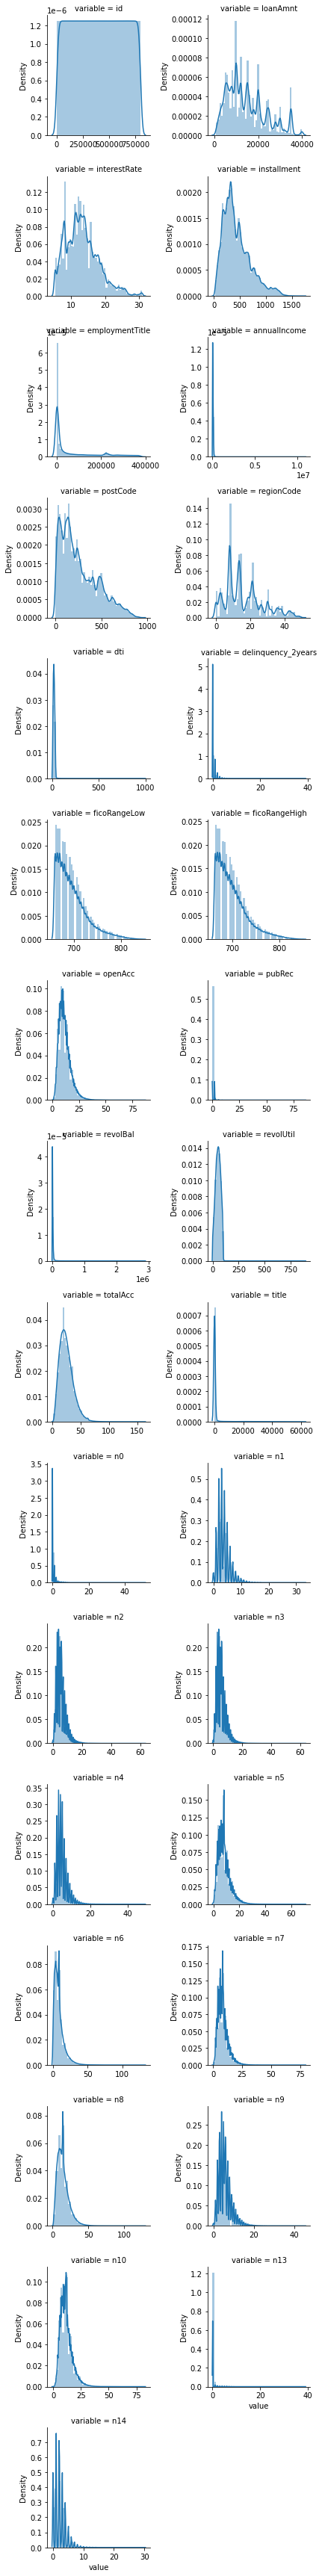

In [32]:
#每个数字特征得分布可视化
f = pd.melt(data, value_vars=continuous_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

- 查看某一个数值型变量的分布，查看变量是否符合正态分布，如果不符合正太分布的变量可以log化后再观察下是否符合正态分布。
- 如果想统一处理一批数据变标准化 必须把这些之前已经正态化的数据提出
- 正态化的原因：一些情况下正态非正态可以让模型更快的收敛，一些模型要求数据正态（eg. GMM、KNN）,保证数据不要过偏态即可，过于偏态可能会影响模型预测结果。

Text(0, 0.5, 'Probability')

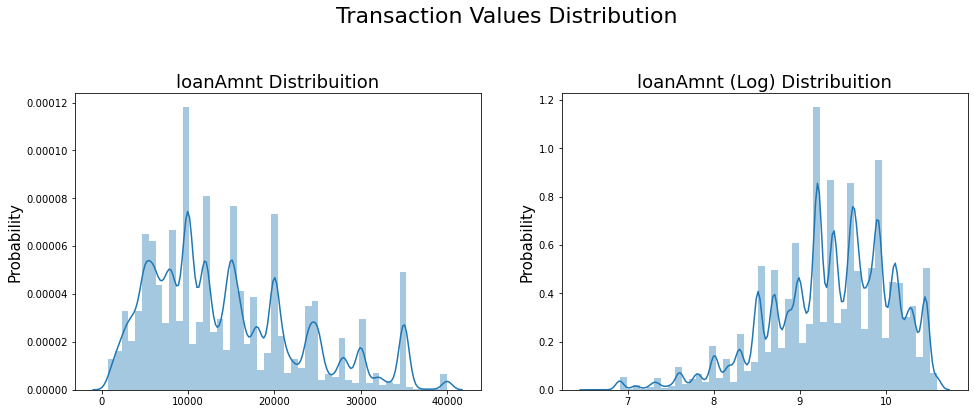

In [33]:
# 可以更加详细的对单个变量进行分析，下面以LoanAmount为例
## 由于matplotlib使用中文需要额外设置，下面都使用英文
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

# 对LoanAmount进行log处理，进行对比
plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

## 非数值类别型变量分析 <a id = '3.2'>

In [34]:
data['grade'].value_counts()

B    233410
C    226759
A    139495
D    119230
E     55559
F     19015
G      5355
Name: grade, dtype: int64

In [35]:
data['subGrade'].value_counts()

C1    50692
B4    49454
B5    48916
B3    48548
C2    46996
C3    44680
C4    44188
B2    44170
B1    42322
C5    40203
A5    38008
A4    30883
D1    30487
D2    26478
A1    25890
D3    23365
A3    22620
A2    22094
D4    21100
D5    17800
E1    14048
E2    12718
E3    10903
E4     9254
E5     8636
F1     5917
F2     4328
F3     3570
F4     2854
F5     2346
G1     1758
G2     1228
G3      977
G4      749
G5      643
Name: subGrade, dtype: int64

In [36]:
data['employmentLength'].value_counts()

10+ years    262512
2 years       72264
3 years       64084
< 1 year      64071
1 year        52394
5 years       50051
4 years       47930
Other         46541
6 years       37210
8 years       36152
7 years       35370
9 years       30244
Name: employmentLength, dtype: int64

In [37]:
data['issueDate'].value_counts()

2016-03-01    29041
2015-10-01    25519
2015-07-01    24480
2015-12-01    23234
2014-10-01    21450
              ...  
2008-02-01        4
2008-01-01        3
2007-08-01        1
2007-11-01        1
2007-10-01        1
Name: issueDate, Length: 135, dtype: int64

In [38]:
data['earliesCreditLine'].value_counts()

Aug-2001    5559
Aug-2002    5401
Sep-2003    5391
Oct-2001    5250
Aug-2000    5242
            ... 
Aug-1955       1
Feb-1960       1
Sep-1957       1
Jul-1955       1
Jan-1946       1
Name: earliesCreditLine, Length: 720, dtype: int64

在非数值型特征中，可以发现`grade,subgrade,employmentLength`三个变量是类别变量，在以后的特征工程中进行处理。

而`issueData,earliesCreditLine`两个变量是时间变量，我们将其转换为数值变量，将时间转为距离'2022-01-01'的天数

In [39]:
#将issuedate转换为距离2022-01-01的天数
data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2022-01-01', '%Y-%m-%d')
data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [40]:
#将earliesCreditLine转换为距离2022-01-01的天数
data['earliesCreditLine'] = pd.to_datetime(data['earliesCreditLine'])
startdate = datetime.datetime.strptime('2022-01-01', '%Y-%m-%d')
data['earliesCreditLineDT'] = data['earliesCreditLine'].apply(lambda x: x-startdate).dt.days

In [41]:
#删除IssueDate和earliesCreditLine两个原始特征
data.drop(columns = ['issueDate','earliesCreditLine'],inplace = True)

## 目标变量观察 <a id = '3.3'>

In [42]:
data['isDefault'].value_counts(normalize=True)

0    0.800488
1    0.199512
Name: isDefault, dtype: float64

isDefault表示是否违约，其中1表示违约，0表示不违约。

是一个典型的二分类问题

从违约率来分析，由大约19.95%的人违约。这对于违约率来说是比较高的。但是对于二分类问题，存在一定的样本不平衡性

## 小结 <a id = '3.4'>
- 上面我们用value_counts()等函数看了特征属性的分布，但是图表是概括原始信息最便捷的方式。
- 数无形时少直觉。
- 同一份数据集，在不同的尺度刻画上显示出来的图形反映的规律是不一样的。python将数据转化成图表，但结论是否正确需要由你保证。

# 可视化分析 <a id = '4'>

## 单一特征可视化<a id = '4.1'>

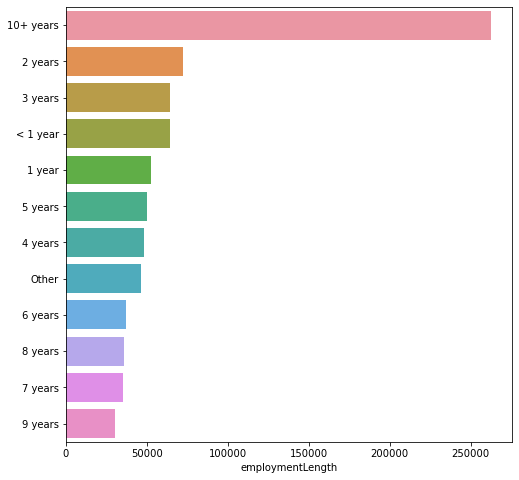

In [43]:
plt.figure(figsize=(8, 8))
sns.barplot(data["employmentLength"].value_counts(dropna=False)[:20],
            data["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

## 与目标变量的交互分析 <a id = '4.2'>

### 类别型变量与目标变量的交互分析 <a id = '4.2.1'>

In [44]:
train_loan_fr = data.loc[data['isDefault'] == 1]
train_loan_nofr = data.loc[data['isDefault'] == 0]

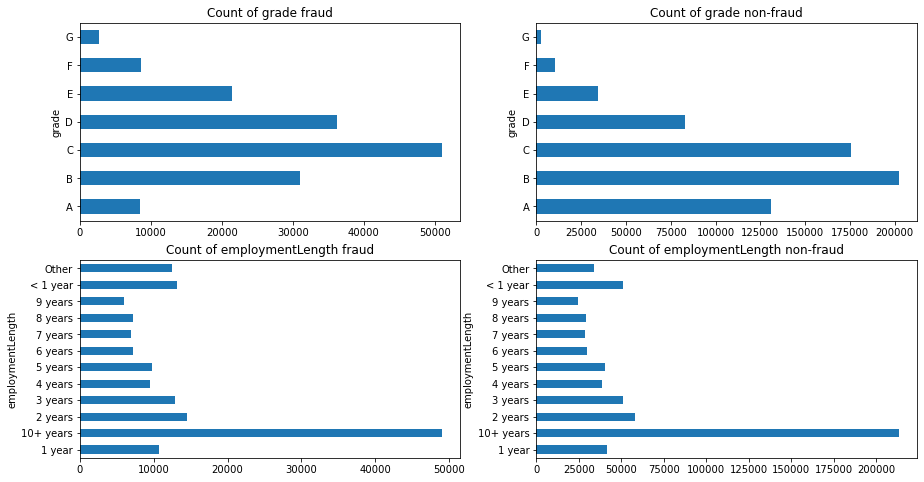

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

### 连续型变量与目标变量的交互分析 <a id = '4.2.2'>

<AxesSubplot:title={'center':'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

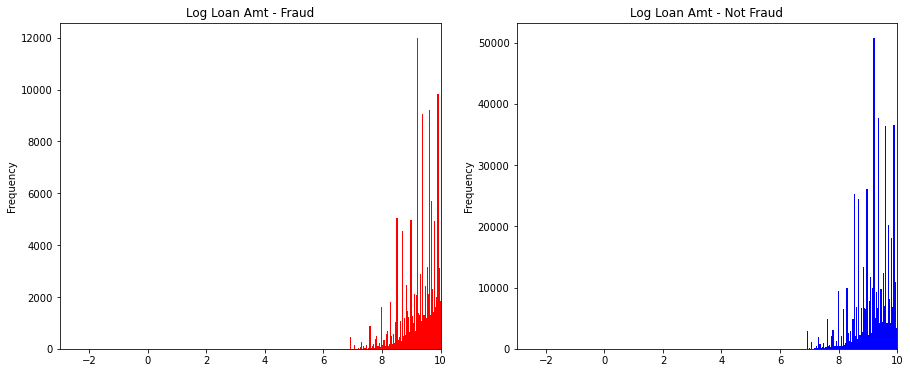

In [46]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data.loc[data['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data.loc[data['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

# 总结 <a id = '5'>

In [48]:
# 数据进行了一定的预处理，因此保存这个处理完的数据，后续在此基础上进行特征工程
data.to_csv('train_EDA.csv')

数据探索性分析是我们初步了解数据，熟悉数据为特征工程做准备的阶段，甚至很多时候EDA阶段提取出来的特征可以直接当作规则来用，可见EDA的重要性。

这个阶段的主要工作还是借助于各个简单的统计量来对数据整体的了解，分析各个类型变量相互之间的关系，以及用合适的图形可视化出来直观观察，且只对一些特征进行了举例说明，没有详细分析各个特征，实际应该对特征进行更详细的分析。

本节还进行了一定的数据预处理的工作，后续将进行更精细的数据分析与处理工作。